{{< pagebreak >}}

## ISL Exercise 4.8.1 (10pts)

Using a little bit of algebra, prove that (4.2) is equivalent to (4.3). In
other words, the logistic function representation and logit represen-
tation for the logistic regression model are equivalent.

#### Solution

We prove the equivalance of 4.2 and 4.3 with the following. Consider the given expression for the logistic function:
\begin{align*}
 p(X) &= \frac{e^{\beta_0 + \beta_1 X}}{1 + e^{\beta_0 + \beta_1 X}} \\
 (1 + e^{\beta_0 + \beta_1 X}) p(X) &= e^{\beta_0 + \beta_1 X} 
\end{align*}
We now find $1-p(X)$ 
\begin{align*}
 1 - p(X) &= 1 - \frac{e^{\beta_0 + \beta_1 X}}{1 + e^{\beta_0 + \beta_1 X}} \\
 &= \frac{1 + e^{\beta_0 + \beta_1 X}}{1 + e^{\beta_0 + \beta_1 X}} - \frac{e^{\beta_0 + \beta_1 X}}{1 + e^{\beta_0 + \beta_1 X}} \\
 &= \frac{1}{1 + e^{\beta_0 + \beta_1 X}}
\end{align*}
We can invert this to see that 
$$
\frac{1}{1-p(X)} = 1 + e^{\beta_0 + \beta_1 X}
$$
Therefore we see that
\begin{align*}
 p(X) &= \frac{e^{\beta_0 + \beta_1 X}}{1 + e^{\beta_0 + \beta_1 X}} \\
 (1 + e^{\beta_0 + \beta_1 X}) p(X) &= e^{\beta_0 + \beta_1 X}\\
 \frac{p(X)}{1-p(X)} & = e^{\beta_0 + \beta_1 X}
\end{align*}
Hence we have shown that the logistic function respresentation and logit representation for the logsitic regression model are equivalent.

## ISL Exercise 4.8.6 (10pts)

Suppose we collect data for a group of students in a statistics class with variables $X_1 = \text{hours studied}$, $X_2 = \text{undergrad GPA}$, and $Y = \text{receive an A}$. We fit a logistic regression and produce estimated coefficients, $\hat{\beta}_0 = -6$, $\hat{\beta}_1 = 0.05$, and $\hat{\beta}_2 = 1$

### Part (a)

Estimate the probability that a student who studies for 40 hours and has an undergrad GPA of 3.5 gets an A in the class.

#### Solution

With the above information we find the probability $\hat{p}(X)$:
\begin{align*}
 \hat{p}(X) &= \frac{e^{\beta_0 + \beta_1 x_1 + \beta_2 x_2}}{1 + e^{\beta_0 + \beta_1 x_1 + \beta_2 x_2}} \\
 &= \frac{e^{-6 + 0.05(40) + 3.5}}{1 + e^{-6 + 0.05(40) + 3.5}} \\
 &= \frac{e^{-0.5}}{1 + e^{-0.5}} \\
 &= 0.3775
\end{align*}

### Part (b)

How many hours would the student in part (a) need to study to have a 50\% chance of getting an A in the class?

#### Solution

\begin{align*}
\hat{p}(X) &= \frac{e^{\beta_0 + \beta_1 x_1 + \beta_2 x_2}}{1 + e^{\beta_0 + \beta_1 x_1 + \beta_2 x_2}} \\
0.5 &= \frac{e^{-6 + 0.05x_1 + 3.5}}{1 + e^{-6 + 0.05 x_1 + 3.5}}
\end{align*}
Instead we can use the alternative formulation from equation (4.6):
\begin{align*}
\ln \left( \frac{p(X)}{1 - p(X)} \right ) &= \beta_0 + \beta_1 x_1 + \beta_2 x_2 \\
\ln \left( \frac{0.5}{1 - 0.5} \right ) &= -6 + 0.05 x_2 + 3.5 \\
0 &= -2.5 + 0.05x_2 \\
&\implies x_2 = 50
\end{align*}

## ISL Exercise 4.8.9 (10pts)

This problem has to do with *odds*.

### Part (a)

On average, what fraction of people with odds of 0.37 of defualting on their credit card payment will in fact default?

#### Solution

We define odds as $\frac{p(X)}{1 - p(X)}$. Hence, if odds is equal to 0.37 then
\begin{align*}
\frac{p(X)}{1 - p(X)} &= 0.37 \\
p(X) &= 0.37 - 0.37p(X) \\
1.37p(X) &= 0.37 \\
&\implies p(X) = \frac{0.37}{1.37} = 0.2701
\end{align*}

### Part (b)

Suppose that an individual has a 16% chance of defaulting on her credit card payment. What are the odds that she will default?

#### Solution

If probability is equal to 0.16 then odds will be
$$\frac{0.16}{1-0.16} = \frac{0.16}{0.84} = 0.1905$$

## ISL Exercise 4.8.13 (a)-(i) (50pts)

This question should be answered using the `Weekly` dataset, which is part of the `ISLR2` package. This dat is similar in nature to the `Smarket` data from this chapter's lab, except it contains 1,089 weekly returns for 21 years, from the beginning of 1990 to the end of 2010.

In [2]:
# Standard Imports
import pandas as pd
import io
import requests
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# Statsmodels Imports
import statsmodels.formula.api as smf
import statsmodels.api as sm
# Sklearn Imports
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score

### Part (a)

Produce some numerical and graphical summaries of the `Weekly` data. Do there appear to be any patterns?

#### Solution

Firstly, I will load the data from Dr. Zhou's Github Repository using the following code:

In [3]:
# Loading Data
url = "https://raw.githubusercontent.com/ucla-econ-425t/2023winter/master/slides/data/Weekly.csv"
s = requests.get(url).content
Weekly = pd.read_csv(io.StringIO(s.decode('utf-8')))
Weekly.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up


Notice that the `Direction` variable is categorical. We will convert this to a binary so that our plots make more sense.

In [4]:
# Convert y to binary
Weekly = pd.get_dummies(Weekly).drop('Direction_Down', axis=1)
Weekly.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction_Up
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,0
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,0
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,1
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,1
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,1


Notice now our response variable takes the value 1 if the stock market went up and 0 if it went down. We will produce some numerical and graphical summaries of the data.

In [15]:
# Descriptive Statistics
Weekly.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,1089.0,2000.048669,6.033182,1990.000000,1995.000000,2000.00000,2005.000000,2010.000000
Lag1,1089.0,0.150585,2.357013,-18.195000,-1.154000,0.24100,1.405000,12.026000
Lag2,1089.0,0.151079,2.357254,-18.195000,-1.154000,0.24100,1.409000,12.026000
Lag3,1089.0,0.147205,2.360502,-18.195000,-1.158000,0.24100,1.409000,12.026000
Lag4,1089.0,0.145818,2.360279,-18.195000,-1.158000,0.23800,1.409000,12.026000
Lag5,1089.0,0.139893,2.361285,-18.195000,-1.166000,0.23400,1.405000,12.026000
Volume,1089.0,1.574618,1.686636,0.087465,0.332022,1.00268,2.053727,9.328214
Today,1089.0,0.149899,2.356927,-18.195000,-1.154000,0.24100,1.405000,12.026000
Direction_Up,1089.0,0.555556,0.497132,0.000000,0.000000,1.00000,1.000000,1.000000


In [16]:
Weekly

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction_Up
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,0
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,0
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,1
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,1
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,1
...,...,...,...,...,...,...,...,...,...
1084,2010,-0.861,0.043,-2.173,3.599,0.015,3.205160,2.969,1
1085,2010,2.969,-0.861,0.043,-2.173,3.599,4.242568,1.281,1
1086,2010,1.281,2.969,-0.861,0.043,-2.173,4.835082,0.283,1
1087,2010,0.283,1.281,2.969,-0.861,0.043,4.454044,1.034,1


From the above summary, we see that all of our variables have 1089 observations. Additionally, we see the mean, standard deviation, and 5 number summary of our variables. In terms of our response, a mean of 0.55 implies that the stock market "goes up" more often then it "goes down" but it says nothing of magnitude.

Text(0.5, 0.98, 'Pairwise Scatterplots')

<Figure size 576x576 with 0 Axes>

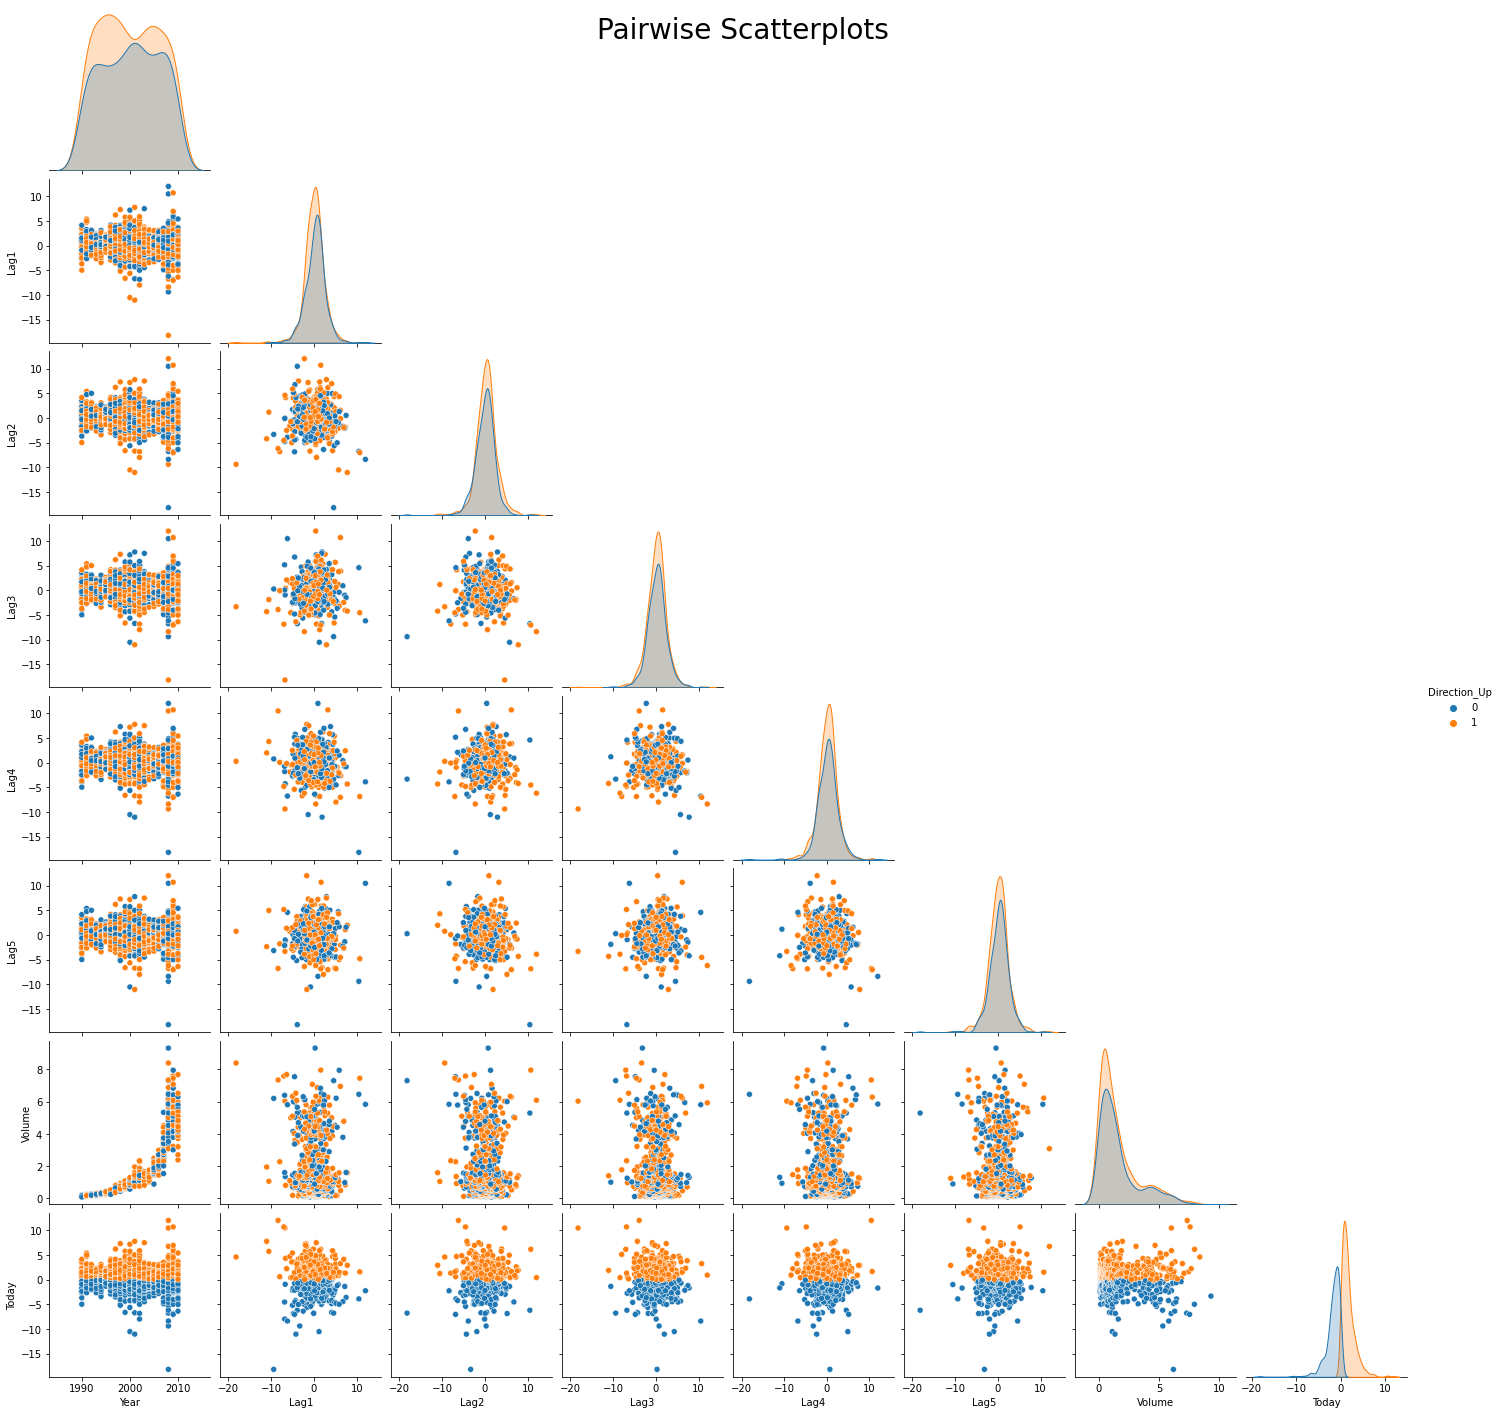

In [39]:
# Giant Pairplot
plt.figure(figsize=(8,8))
g = sns.pairplot(Weekly, hue="Direction_Up", corner=True)
g.fig.suptitle("Pairwise Scatterplots", fontsize=28)

Text(0.5, 0.98, 'Correlation Heatmap')

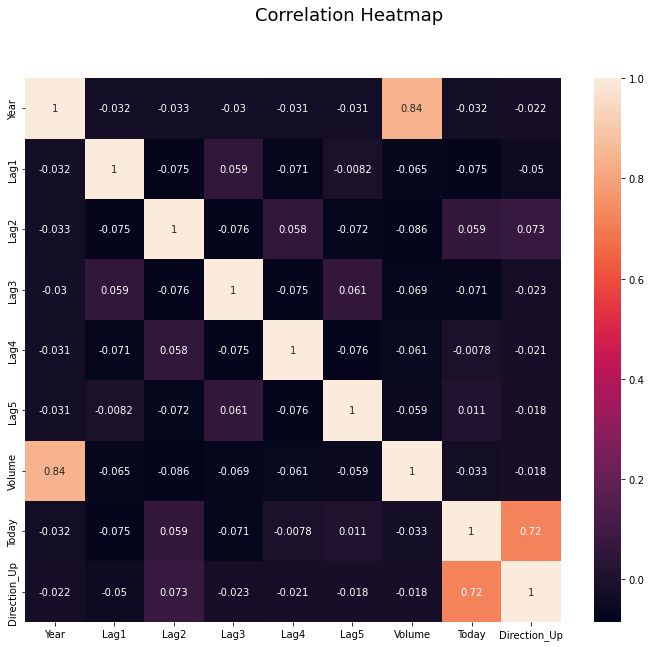

In [46]:
# Correlations
correlations = Weekly.corr()
g = plt.figure(figsize=(12,10))
sns.heatmap(correlations,
            vmax=1, annot=True)
g.suptitle("Correlation Heatmap", fontsize=18)

From pairplot, we notice a couple things. Namely, we see that **volume appears to exponentially increase with the year**. Additionally, we look closer at the density plots for `today` and notice (with the hue) that if the returns for this week are positive then the market moved upward. Whilst obvious, it is a feature of the data that we observe to hold true. Additionally, we notice a large right skew for `Volume`.

From the correlation heatmap, we see that `Today` and `Direction_Up` are positively correlated (to be expected). Additionally, we see that `Volume` and `Year` are highly positively correlated. We noticed a similar trend in the pairplot and we get confirmation of this correlation hear.

### Part (b)

Use the full data set to perform a logistic regression with `Direction` as the response and the five lag variables plus `Volume` as predictors. Use the summary function to print the results. Do any of the predictors appear to be statistically significant? If so, which ones?

#### Solution

In this section, we will use `stats-models` to perofmr the logistic regression only because the problem asks us to print a summary. This is not a feaature that is available with `sklearn`.

In [6]:
# Logistic regression
logit_mod_13b = smf.logit(
    formula = 'Direction_Up ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume',
    data = Weekly
).fit()
print(logit_mod_13b.summary())

Optimization terminated successfully.
         Current function value: 0.682441
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:           Direction_Up   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1082
Method:                           MLE   Df Model:                            6
Date:                Tue, 14 Feb 2023   Pseudo R-squ.:                0.006580
Time:                        09:42:11   Log-Likelihood:                -743.18
converged:                       True   LL-Null:                       -748.10
Covariance Type:            nonrobust   LLR p-value:                    0.1313
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2669      0.086      3.106      0.002       0.098       0.435
Lag1          -0.0413      0.

From the above summary table, it is clear that the only variable statistically significant at the 5\% level is `Lag2` since its p-value is less than 0.05.

### Part (c)

Compute the confusion matrix and overall fraction of correct
predictions. Explain what the confusion matrix is telling you
about the types of mistakes made by logistic regression.

#### Solution

In [7]:
# Function to output cleaner confusion matrix
def confusion_matrix_nice(confusion_mtx):
    confusion_df = pd.DataFrame({'y_pred=0': np.append(confusion_mtx[:, 0],
                                                        confusion_mtx.sum(axis=0)[0]),
                                 'y_pred=1': np.append(confusion_mtx[:, 1],
                                                        confusion_mtx.sum(axis=0)[1]),
                                 'Total': np.append(confusion_mtx.sum(axis=1), ''),
                                 '': ['y=0', 'y=1', 'Total']}).set_index('')
    return confusion_df

# Getting simple confusion matrix from statsmodels
confusion_matrix_13c = logit_mod_13b.pred_table(threshold=0.5)

# Getting cleaner confusion matrix
confusion_matrix_nice(confusion_matrix_13c)

,y_pred=0,y_pred=1,Total
,,,
y=0,54.0,430.0,484.0
y=1,48.0,557.0,605.0
Total,102.0,987.0,


The "overall fraction of correct predictions" is simply the accuracy rate of our model. Hence, we compute the accuracy below.

In [8]:
# Accuracy
acc = (confusion_matrix_13c[1,1] + confusion_matrix_13c[0,0])/np.sum(confusion_matrix_13c)
print("Accuracy: ", acc)

# False positive rate
fpr = confusion_matrix_13c[0,1] / np.sum(confusion_matrix_13c[0,:])
print("False Positive Rate:", fpr)

# False negative rate
fnr = confusion_matrix_13c[1, 0] / np.sum(confusion_matrix_13c[1, :])
print("False Negative Rate: ", fnr)

Accuracy:  0.5610651974288338
False Positive Rate: 0.8884297520661157
False Negative Rate:  0.07933884297520662


We find that **the total accuracy of the model is about 56\%**. Recall from the summary table that about 55% of all results were 1 which meant that 55% of the time the stock market went up. Hence, this logit model barely outperformed us guessing that the market will go up every single time. The confusion matrix also gives us insight into the false positive and false negative rate of our model.

Namely, we see that the false positive rate is about 88\%. This means that our model often predicted that the stock market would go up when it actually went down. We also see that our false negative rate is far better at about 8\%. This means that about 8\% of the times we said the stock market would go down, it went up.

Unsurprisingly, the biggest problem with our model is that we are too easily predicted that the stock market will go up. This is likely a result of the arbitrary threshold of 0.5 that we chose in running our predictions. However, it could also be a result of our model choice.

### Part (d)

Now fit the logistic regression model using a training data period from 1990 to 2008 with `Lag2` as the only predictor. Compute the confusion matrix and the overall fraction of correct predictions for the hold out data (that is, the data from 2009 and 2010).

#### Solution

In [5]:
# Training - testing data
cutoff = Weekly.index[Weekly['Year'] < 2009]
Weekly_train = Weekly.iloc[cutoff]
Weekly_test = Weekly.drop(cutoff)

y_test = pd.Series(Weekly_test['Direction_Up']).to_numpy()
X_test = pd.Series(Weekly_test['Lag2']).to_numpy()

In [6]:
# Training variables
X = pd.Series(Weekly_train['Lag2']).to_numpy()
y = pd.Series(Weekly_train['Direction_Up']).to_numpy()
# Reshaping to work with sklearn
n_samples = X.shape[0]
n_features = 1
X_rs = np.reshape(X, (n_samples,n_features))

# Pipeline
pipe_logit = Pipeline(steps = [
    ("model", LogisticRegression())
])

# Fit Logistic regression
logit_fit = pipe_logit.fit(X_rs,y)
logit_fit

Pipeline(steps=[('model', LogisticRegression())])

Accuracy (Logit):  0.625


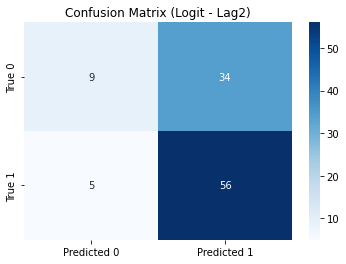

In [7]:
X_test_rs = np.reshape(X_test, (104,1))

# Predictions
logit_pred = logit_fit.predict(X_test_rs)
cm = confusion_matrix(y_test, logit_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d',
            xticklabels=['Predicted 0','Predicted 1'], 
            yticklabels=['True 0','True 1']).set(
                title='Confusion Matrix (Logit - Lag2)'
            )
acc_logit = accuracy_score(y_test, logit_pred)
print('Accuracy (Logit): ', acc_logit)

Hence, we see from the above confusion  matrix and reported accuracy score that **the overall accuracy of this model is about 62.5\%**. This is higher than the previous model with more features. Although it may not be an apples to apples comparison since here we are only predicting on the from 2009 to 2010.

### Part (e)

Repeat (d) using Linear Discriminant Analysis.

#### Solution

In [123]:
# Pipeline
pipe_lda = Pipeline(steps = [
    ("model", LinearDiscriminantAnalysis())
])

# Fit LDA
lda_fit = pipe_lda.fit(X_rs,y)
lda_fit

Pipeline(steps=[('model', LinearDiscriminantAnalysis())])

Accuracy (LDA):  0.625


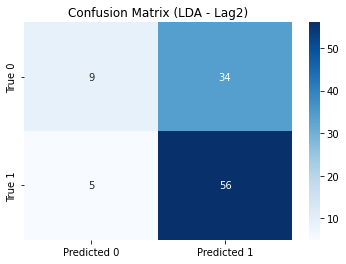

In [124]:
# Predictions
lda_pred = lda_fit.predict(X_test_rs)
cm = confusion_matrix(y_test, lda_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d',
            xticklabels=['Predicted 0','Predicted 1'], 
            yticklabels=['True 0','True 1']).set(
                title='Confusion Matrix (LDA - Lag2)'
            )
acc_lda = accuracy_score(y_test, lda_pred)
print('Accuracy (LDA): ', acc_lda)

We see from the above LDA model that the confusion matrix is identical to that of the Logistic regression model. Subsequently, we see that in this instance, they have the same **accuracy score of 62.5%**.

### Part (f)

Repeat (d) using Quadratic Discriminant Analysis.

#### Solution

In [126]:
# Pipeline
pipe_qda = Pipeline(steps = [
    ("model", QuadraticDiscriminantAnalysis())
])

# Fit QDA
qda_fit = pipe_qda.fit(X_rs,y)
qda_fit

Pipeline(steps=[('model', QuadraticDiscriminantAnalysis())])

Accuracy (QDA):  0.5865384615384616


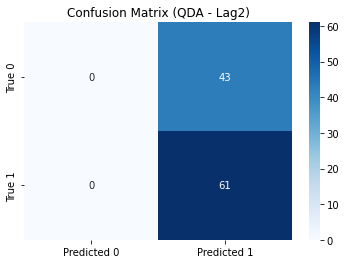

In [127]:
# Predictions
qda_pred = qda_fit.predict(X_test_rs)
cm = confusion_matrix(y_test, qda_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d',
            xticklabels=['Predicted 0','Predicted 1'], 
            yticklabels=['True 0','True 1']).set(
                title='Confusion Matrix (QDA - Lag2)'
            )
acc_qda = accuracy_score(y_test, qda_pred)
print('Accuracy (QDA): ', acc_qda)

Interestingly in the QDA model, there were no predicted 0s (or instances where the stock market went down). This leads us to get an **accuracy score of about 58.6\%**. This is lower than our previous attempts which might lead us to belive that the decision boundaries for the classification problem are not quadratic.

### Part (g)

Repeat (d) with KNN with $K=1$.

#### Solution

In [129]:
# Pipeline
pipe_knn = Pipeline(steps = [
    ("model", KNeighborsClassifier(n_neighbors=1))
])

# Fit KNN with K = 1
knn_fit = pipe_knn.fit(X_rs,y)
knn_fit

Pipeline(steps=[('model', KNeighborsClassifier(n_neighbors=1))])

Accuracy (KNN, K=1):  0.5096153846153846


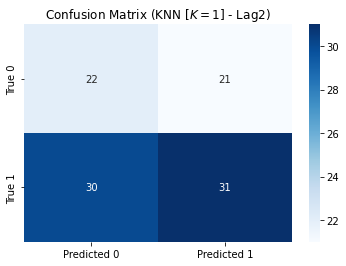

In [132]:
# Predictions
knn_pred = knn_fit.predict(X_test_rs)
cm = confusion_matrix(y_test, knn_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d',
            xticklabels=['Predicted 0','Predicted 1'], 
            yticklabels=['True 0','True 1']).set(
                title='Confusion Matrix (KNN [$K=1$] - Lag2)'
            )
acc_knn = accuracy_score(y_test, knn_pred)
print('Accuracy (KNN, K=1): ', acc_knn)

The K-Nearest Neighbor model with $K=1$ has performed the worst so far in terms of **accuracy with a score of about 51\%**.

### Part (h)

Repeat (d) using naive Bayes.

#### Solution

In [134]:
# Pipeline
pipe_nb = Pipeline(steps = [
    ("model", GaussianNB())
])

# Fit  Naive Bayes classifier
nb_fit = pipe_nb.fit(X_rs,y)
nb_fit

Pipeline(steps=[('model', GaussianNB())])

Accuracy (Naive Bayes):  0.5865384615384616


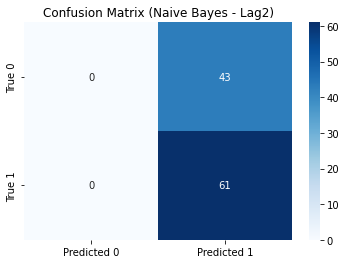

In [135]:
# Predictions
nb_pred = nb_fit.predict(X_test_rs)
cm = confusion_matrix(y_test, nb_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d',
            xticklabels=['Predicted 0','Predicted 1'], 
            yticklabels=['True 0','True 1']).set(
                title='Confusion Matrix (Naive Bayes - Lag2)'
            )
acc_nb = accuracy_score(y_test, nb_pred)
print('Accuracy (Naive Bayes): ', acc_nb)

Just like QDA, the naive Bayes model ends up predicting every input as a 1 (i.e., the stock market will go up). Thus it achieves an **accuracy score of about 58.6\%** which is the same as QDA. It is also the same as just predicting the most popular class (in this case, the stock market going up).

### Part (i)

Which of these methods appears to provide the best results on this data?

#### Solution

If we use accuracy score as our metric, then the two best models are **Logistic Regression** and **Linear Discriminant Analysis**. In particular, they have the same accuracy score which is higher than all other models tested with this data.

For robustness, we will consider a different metric -- AUC.

In [142]:
# Robustness under AUC scores
logit_auc = roc_auc_score(
  y_test,
  logit_fit.predict_proba(X_test_rs)[:, 1]
)
lda_auc = roc_auc_score(
  y_test,
  lda_fit.predict_proba(X_test_rs)[:, 1]
)
qda_auc = roc_auc_score(
  y_test,
  qda_fit.predict_proba(X_test_rs)[:, 1]
)
knn_auc = roc_auc_score(
  y_test,
  knn_fit.predict_proba(X_test_rs)[:, 1]
)
nb_auc = roc_auc_score(
  y_test,
  nb_fit.predict_proba(X_test_rs)[:, 1]
)
print('AUC (Logit): ', logit_auc)
print('AUC (LDA): ', lda_auc)
print('AUC (QDA): ', qda_auc)
print('AUC (KNN, K=1): ', knn_auc)
print('AUC (Naive Bayes): ', nb_auc)


AUC (Logit):  0.5463210064811285
AUC (LDA):  0.5463210064811285
AUC (QDA):  0.508577964163172
AUC (KNN, K=1):  0.5099123141441098
AUC (Naive Bayes):  0.5074342356080823


We see that the results do not really change when we consider a different metric like AUC. Logit and LDA still outperform every other model tested on this data.

## Bonus question: ISL Exercise 4.8.13 Part (j) (30pts)

Experiment with different combinations of predictors, including possible transformations and interactions, for each of the methods. Report the variables, method, and associated confusion matrix that appears to provide the best results on the held out data. Note that you should also experiment with values for $K$ in KNN classifier.

#### Solution

We will begin by using `PolynomialFeatures` from `sklearn` to include all quadratic combinations of our features. Then we will use `SelectKBest` from there onwards to select only the $k$ best features for each model. We will decide on the optimal $k$ using cross-validation. We will test all of the previously explored models. Additionally, for the KNN model, we will cross validate **both the optimal number of features and the optimal number of neighbors**.

In [46]:
# Additional sklearn imports
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import GridSearchCV

In [38]:
# Testing - Testing data
cutoff = Weekly.index[Weekly['Year'] < 2009]
Weekly_train = Weekly.iloc[cutoff]
Weekly_test = Weekly.drop(cutoff)

y_test = pd.Series(Weekly_test['Direction_Up']).to_numpy()
X_test = Weekly_test.drop(['Direction_Up', 'Today'], axis=1)

# Training variables
X = Weekly_train.drop(['Direction_Up', 'Today'], axis=1)
y = pd.Series(Weekly_train['Direction_Up']).to_numpy()

Accuracy (Logit w/ quad features):  0.46153846153846156


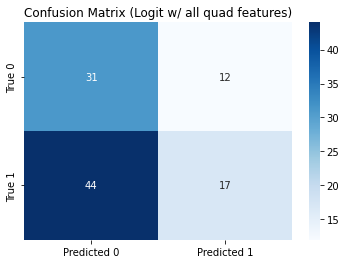

In [41]:
# Logistic Regression with polynomial features
## Takes all quadratic combination of original features
polyfeat = PolynomialFeatures(degree=2, include_bias=False)

# Pipeline
pipe_logit_poly = Pipeline(steps = [
    ("poly", polyfeat),
    ("model", LogisticRegression())
])

# Fit Logistic regression
logit_poly_fit = pipe_logit_poly.fit(X,y)

# Predictions
logit_poly_pred = logit_poly_fit.predict(X_test)
cm = confusion_matrix(y_test, logit_poly_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d',
            xticklabels=['Predicted 0','Predicted 1'], 
            yticklabels=['True 0','True 1']).set(
                title='Confusion Matrix (Logit w/ all quad features)'
            )
acc_logit_poly = accuracy_score(y_test, logit_poly_pred)
print('Accuracy (Logit w/ quad features): ', acc_logit_poly)

Accuracy (Logit w/ k-best features):  0.5096153846153846
Best parameters: {'kbest__k': 6}


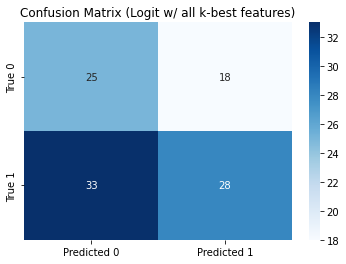

In [60]:
# Logistic Regression with K best features
kbest = SelectKBest(score_func=f_classif)

# Pipeline
pipe_logit_kbest = Pipeline(steps = [
    ("kbest", kbest),
    ("model", LogisticRegression())
])

# Parameter grid for CV
param_grid = {'kbest__k': [1,2,3,4,5,6,7]}

# Set up CV
cv_logit = GridSearchCV(
    pipe_logit_kbest,
    param_grid=param_grid,
    cv=5,
    scoring="accuracy",
    refit=True)

# Fit Logistic regression
logit_kbest_fit = cv_logit.fit(X,y)

# Predictions
logit_kbest_pred = logit_kbest_fit.predict(X_test)
cm = confusion_matrix(y_test, logit_kbest_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d',
            xticklabels=['Predicted 0','Predicted 1'], 
            yticklabels=['True 0','True 1']).set(
                title='Confusion Matrix (Logit w/ all k-best features)'
            )
acc_logit_kbest = accuracy_score(y_test, logit_kbest_pred)
print('Accuracy (Logit w/ k-best features): ', acc_logit_kbest)
print("Best parameters:", cv_logit.best_params_)

Accuracy (LDA w/ k-best features):  0.5673076923076923
Best parameters: {'kbest__k': 1}


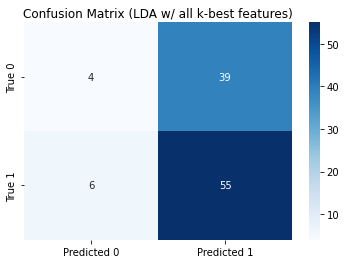

In [68]:
# LDA with K best features
kbest = SelectKBest(score_func=f_classif)

# Pipeline
pipe_lda_kbest = Pipeline(steps = [
    ("kbest", kbest),
    ("model", LinearDiscriminantAnalysis())
])

# Parameter grid for CV
param_grid = {'kbest__k': [1,2,3,4,5,6,7]}

# Set up CV
cv_lda = GridSearchCV(
    pipe_lda_kbest,
    param_grid=param_grid,
    cv=5,
    scoring="accuracy",
    refit=True)

# Fit LDA
lda_kbest_fit = cv_lda.fit(X,y)

# Predictions
lda_kbest_pred = lda_kbest_fit.predict(X_test)
cm = confusion_matrix(y_test, lda_kbest_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d',
            xticklabels=['Predicted 0','Predicted 1'], 
            yticklabels=['True 0','True 1']).set(
                title='Confusion Matrix (LDA w/ all k-best features)'
            )
acc_lda_kbest = accuracy_score(y_test, lda_kbest_pred)
print('Accuracy (LDA w/ k-best features): ', acc_lda_kbest)
print("Best parameters:", cv_lda.best_params_)

Accuracy (QDA w/ k-best features):  0.46153846153846156
Best parameters: {'kbest__k': 3}


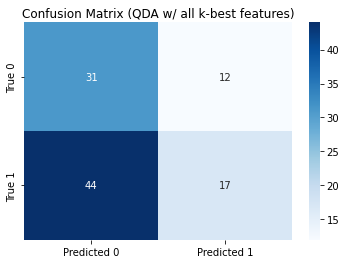

In [69]:
# QDA with K best features
kbest = SelectKBest(score_func=f_classif)

# Pipeline
pipe_qda_kbest = Pipeline(steps = [
    ("kbest", kbest),
    ("model", QuadraticDiscriminantAnalysis())
])

# Parameter grid for CV
param_grid = {'kbest__k': [1,2,3,4,5,6,7]}

# Set up CV
cv_qda = GridSearchCV(
    pipe_qda_kbest,
    param_grid=param_grid,
    cv=5,
    scoring="accuracy",
    refit=True)

# Fit QDA
qda_kbest_fit = cv_qda.fit(X,y)

# Predictions
qda_kbest_pred = qda_kbest_fit.predict(X_test)
cm = confusion_matrix(y_test, qda_kbest_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d',
            xticklabels=['Predicted 0','Predicted 1'], 
            yticklabels=['True 0','True 1']).set(
                title='Confusion Matrix (QDA w/ all k-best features)'
            )
acc_qda_kbest = accuracy_score(y_test, qda_kbest_pred)
print('Accuracy (QDA w/ k-best features): ', acc_qda_kbest)
print("Best parameters:", cv_qda.best_params_)

Accuracy (KNN w/ k-best features):  0.47115384615384615
Best parameters: {'kbest__k': 5, 'knn__n_neighbors': 1}


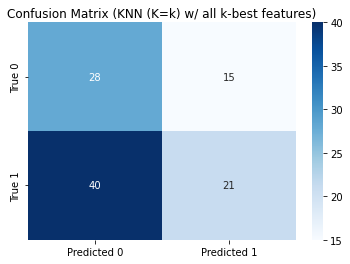

In [78]:
# K Nearest Neighbor Classifier
kbest = SelectKBest(score_func=f_classif)

# Pipeline
pipe_knn_kbest = Pipeline(steps = [
    ("kbest", kbest),
    ("knn", KNeighborsClassifier())
])

# Parameter grid for CV
param_grid = {'kbest__k': [1,2,3,4,5,6,7],
              'knn__n_neighbors': [1,3,5,10]}

# Set up CV
cv_knn = GridSearchCV(
    pipe_knn_kbest,
    param_grid=param_grid,
    cv=5,
    scoring="accuracy",
    refit=True)

# Fit cross validated KNN
knn_kbest_fit = cv_knn.fit(X,y)

# Predictions
knn_kbest_pred = knn_kbest_fit.predict(X_test)
cm = confusion_matrix(y_test, knn_kbest_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d',
            xticklabels=['Predicted 0','Predicted 1'], 
            yticklabels=['True 0','True 1']).set(
                title='Confusion Matrix (KNN (K=k) w/ all k-best features)'
            )
acc_knn_kbest = accuracy_score(y_test, knn_kbest_pred)
print('Accuracy (KNN w/ k-best features): ', acc_knn_kbest)
print("Best parameters:", cv_knn.best_params_)

Accuracy (Naive Bayes w/ k-best features):  0.5865384615384616
Best parameters: {'kbest__k': 1}


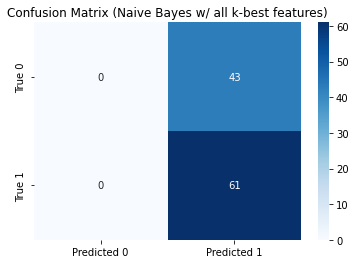

In [73]:
# Naive Bayes with K best features
kbest = SelectKBest(score_func=f_classif)

# Pipeline
pipe_nb_kbest = Pipeline(steps = [
    ("kbest", kbest),
    ("model", GaussianNB())
])

# Parameter grid for CV
param_grid = {'kbest__k': [1,2,3,4,5,6,7]}

# Set up CV
cv_nb = GridSearchCV(
    pipe_nb_kbest,
    param_grid=param_grid,
    cv=5,
    scoring="accuracy",
    refit=True)

# Fit Naive Bayes
nb_kbest_fit = cv_nb.fit(X,y)

# Predictions
nb_kbest_pred = nb_kbest_fit.predict(X_test)
cm = confusion_matrix(y_test, nb_kbest_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d',
            xticklabels=['Predicted 0','Predicted 1'], 
            yticklabels=['True 0','True 1']).set(
                title='Confusion Matrix (Naive Bayes w/ all k-best features)'
            )
acc_nb_kbest = accuracy_score(y_test, nb_kbest_pred)
print('Accuracy (Naive Bayes w/ k-best features): ', acc_nb_kbest)
print("Best parameters:", cv_nb.best_params_)

In [80]:
print('ALL ACCURACY SCORE FOR MODELS')
print('=========================================')
print('(Logit w/ quad features): ', acc_logit_poly)
print('---------------------------------------------------------')
print('(Logit w/ k-best features): ', acc_logit_kbest)
print("Best parameters:", cv_logit.best_params_)
print('---------------------------------------------------------')
print('(LDA w/ k-best features): ', acc_lda_kbest)
print("Best parameters:", cv_lda.best_params_)
print('---------------------------------------------------------')
print('(QDA w/ k-best features): ', acc_qda_kbest)
print("Best parameters:", cv_qda.best_params_)
print('---------------------------------------------------------')
print('(KNN w/ k-best features): ', acc_knn_kbest)
print("Best parameters:", cv_knn.best_params_)
print('---------------------------------------------------------')
print('(Naive Bayes w/ k-best features): ', acc_nb_kbest)
print("Best parameters:", cv_nb.best_params_)

ALL ACCURACY SCORE FOR MODELS
(Logit w/ quad features):  0.46153846153846156
---------------------------------------------------------
(Logit w/ k-best features):  0.5096153846153846
Best parameters: {'kbest__k': 6}
---------------------------------------------------------
(LDA w/ k-best features):  0.5673076923076923
Best parameters: {'kbest__k': 1}
---------------------------------------------------------
(QDA w/ k-best features):  0.46153846153846156
Best parameters: {'kbest__k': 3}
---------------------------------------------------------
(KNN w/ k-best features):  0.47115384615384615
Best parameters: {'kbest__k': 5, 'knn__n_neighbors': 1}
---------------------------------------------------------
(Naive Bayes w/ k-best features):  0.5865384615384616
Best parameters: {'kbest__k': 1}


From the above printout, it is clear that our exploration of alternative models was largely unsuccessful. Of the explored models, the **Naive Bayes** with 1 feature performed the best (in terms of accuracy score). Granted, some of this may be because our optimal number of feature cross validation was done for optimizing f score (there was no default option for accuracy). Hence, these results may improve if our metric was f-score or AUC instead of accuracy. However, with accuracy as our performance metric, the best overall model is still the Logistic Regression or LDA model from the previous parts.

## Bonus question: ISL Exercise 4.8.4 (30pts)

When the number of features $p$ is large, there tends to be a deterioration in the performance of KNN and other *local* approaches that perform prediction using only observations that are near the test observation for which a prediction must be made. This phenomenon is known as the curse of dimensionality, and it ties into the fact that non-parametric approaches often perform poorly when $p$ is large. We will now investigate this curse.

### Part (a)

Suppose that we have a set of observations, each with measurements on $p=1$ feature, $X$. We assume that $X$ is uniformly (evenly) distributed on $[0,1]$. Associated with each observation is a response value. Suppose that we wish to predict a test observation's response using only observations that are within 10\% of the range of $X$ closest to that test observation. For instance, in order to predict the response for a test observation with $X = 0.6$, we will use observations in the range $[0.55,0.65]$. On average, what fraction of the available observations will we use to make the prediction?

#### Solution

Since our random variable $X$ is uniformly distributed on the interval $[0,1]$, it will take every value on the interval with equal probability. Furthermore, since we are using a 10\% range, **we will be using 10\% of our total data** (information) on average.

### Part (b)

Now suppose that we have a set of observations, each with measurements on $p=2$ features, $X_1$, and $X_2$. We assume that $(X_1 , X_2)$ are uniformly distributed on $[0,1] \times [0,1]$. We wish to predict a test observation's response using only observations that are within 10\% of the range of $X_1$ *and* within 10\% of the range of $X_2$ closest t othat test observation. For instance, in order to predict the response for a test observation with $X_1 = 0.6$ and $X_2 = 0.35$, we will use observations in the range $[0.55,0.65]$ for $X_1$ and in the range $[0.3,0.4]$ for $X_2$. On average, what fraction of the available observations will we use to make the prediction?

#### Solution

We only want to use observations wthin 10\% of **both** $X_1$ and $X_2$ for our prediction. This ultimately boils down to a problem of intersection. Hence, we can simply rely on multiplication and find the intersection of data that lie within 10\% of $X_1$ and $X_2$:

$$\text{10\% Range of }X_1 \cap  \text{10\% Range of }X_2 = 0.1 \times 0.1 = 0.01 = 1\%$$

Hence, only **1\% of our data will be available for use in prediction**.

### Part (c)

Now suppose that we have a set of observations on $p=100$ fatures. Again the obsevations are uniformly distributed on each feature, and again each feature ranges in value from 0 to 1. We wish to predict a test obsevation's response using observations within the 10\% of each feature's range that is closest to that test observation. What fraction of the available observations will we use to make the prediction?

#### Solution

Following the same logic as in part (a) and part (b) we set up the intersection as:

$$\bigcap_{p=1}^{100} \text{10\% Range of }X_p = (0.1)^{100} \approx 10^{-98}\%$$

As we can see the amount of data available for prediction rapidly diminishes as we increase the number of features.

### Part (d)

Using your answers to parts (a)-(c), argue that a drawback of KNN when $p$ is large is that there are very few training observations "near" any given test observation.

#### Solution

We want to aruge that a drawback of KNN is that when $p$ is large, there are very few training observations "near" any given test observation. Namely, when we think of observations as being "near" another, we are thinking of some measure of distance -- typically Euclidean. As seen in the previous parts, the percentage of observations near the test point converges to 0 as $p \to \infty$. But as shown, $p$ does not need to be that large for the percentage of available data to become negligably small. The logic behind this is that the training observations need to be "near" our testing observation in *every* dimension. And as we increase the number of dimensions (features, $p$) it gets increasingly less likely. THe higher the dimensionality of the problem, the fewer neighbors the testing observation is likely to have.

### Part (e)

Now suppose that we wish to make a prediction for a test observation by creating a $p$-dimensional hypercube centered around the test observations that contains, on average, 10\% of the training observations. For $p=1,2$ and 100, what is the length of each side of the hypercube? Comment on your answer.

#### Solution

We start with the case where $p=1$. In this case, the hypercube is simly a line segement. Hence, the length of th hypercube is just the length of this line segment. So for it to contain 10\% of the training data, and since our data is uniform on $[0,1]$, **the length of that line segment will just be 0.10**.

Now when $p=2$, we are dealing with a 2-dimensional hypercube which is just a square. The axis of this square are defined by our 2 sets of uniformly distributed observations on $[0,1]$. Hence, for the square (as a whole) to contain 10\% of the training observations, each individual side of the square must have
$$x^2 = 0.10 \times 1 \times 1 = 0.10$$
Therefore, each side of the square will be of length
$$x = \sqrt{0.10} \approx 0.31$$
Therefore, for the whole square to contain 10\% of the training observations, we need each side of the square to be about 0.31 in length (or about 31\% of the interval-axis length).

Now lastly, we take this idea and extend it to a $p=100$ dimensional hypecube. Hypercubes are defined the same way in $p$ dimensional space. In that, the area of it will just be 
$$\text{Area} = \prod_{p=1}^{100} x^p$$
Hence, the length of each side will be
$$x = x^{1/100} = 0.10^{1/100} \approx 0.98$$
Therefore, each side of the hypercube must have a length of 0.98 (recall: the whole axis space is just of length 1). Therefore, for the hypercube to contain 10\% of the training data, it would need to use 98\% of the data from each dimension (feature). Therefore, it is not really a "nearest" neighbor method since it is essentially using all available data.